#### `Data Augumentation`

In order to make the most of our few training examples, we will "augment" them via a number of random transformations, so that our model would never see twice the exact same picture. This helps prevent overfitting and helps the model generalize better.

In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class. This class allows you to:

configure random transformations and normalization operations to be done on your image data during training
instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs, fit_generator, evaluate_generator and predict_generator.

- rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures

- width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally
- rescale is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor.
- shear_range is for randomly applying shearing transformations
- zoom_range is for randomly zooming inside pictures
- horizontal_flip is for randomly flipping half of the images horizontally --relevant when there are no assumptions of horizontal assymetry (e.g. real-world pictures).
- fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift

In [2]:
import matplotlib.pyplot as plt

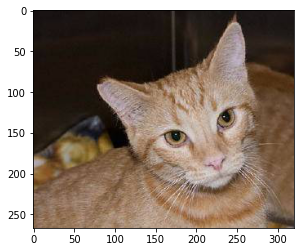

In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/home/shyam/Documents/cat.14.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        plt.imshow(img)
        break  # otherwise the generator would loop indefinitely

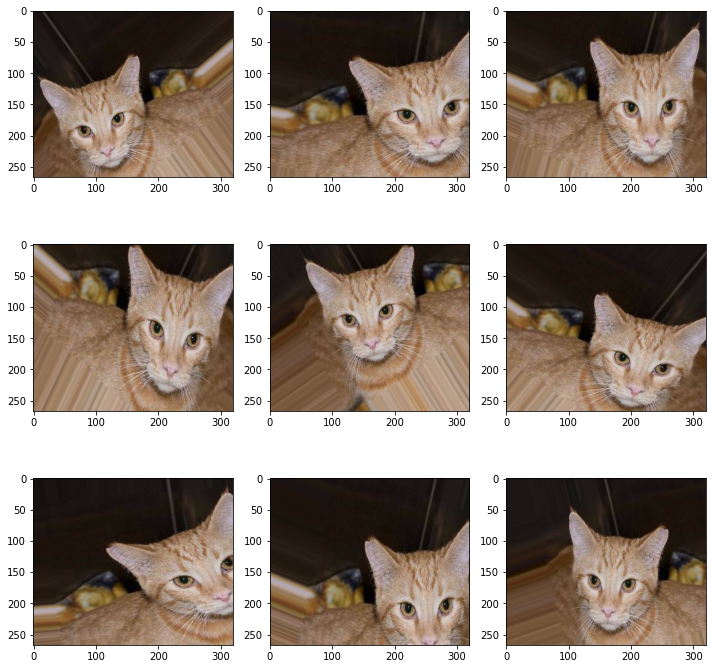

In [14]:
it = datagen.flow(x, batch_size=1)
# generate samples and plot
plt.figure(figsize=(10,10))
for i in range(9):
# define subplot
    plt.subplot(330 + 1 + i)
# generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.tight_layout()
plt.show()


In [13]:
import os
os.listdir('/home/shyam/Documents/preview/')

['cat_0_3201.jpeg',
 'cat_0_8355.jpeg',
 'cat_0_4572.jpeg',
 'cat_0_5828.jpeg',
 'cat_0_173.jpeg',
 'cat_0_2011.jpeg',
 'cat_0_7319.jpeg',
 'cat_0_3425.jpeg',
 'cat_0_5189.jpeg',
 'cat.14.jpg',
 'cat_0_8852.jpeg',
 'cat_0_4346.jpeg',
 'cat_0_4425.jpeg',
 'cat_0_1915.jpeg',
 'cat_0_1981.jpeg',
 'cat_0_1995.jpeg',
 'cat_0_1997.jpeg',
 'cat_0_8167.jpeg',
 'cat_0_2941.jpeg',
 'cat_0_4151.jpeg',
 'cat_0_3462.jpeg',
 'cat_0_115.jpeg']